# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
beautiful_soup = soup(browser.html, 'html.parser')

In [5]:
# Extract all rows of data
mars_table = beautiful_soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_list = []

table_headers = [th.text.strip() for th in mars_table.find_all('th')]
# Loop through the scraped data to create a list of rows
for tr in mars_table.find_all('tr', class_='data-row'):
    mars_list.append([td.text.strip() for td in tr.find_all('td')])


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_list,columns=table_headers)

In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], yearfirst=True)
mars_df['sol'] = pd.to_numeric(mars_df['sol'])
mars_df['ls'] = pd.to_numeric(mars_df['ls'])
mars_df['month'] = pd.to_numeric(mars_df['month'])
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'])

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
len(mars_df['month'].unique())

12

In [13]:
# 2. How many Martian days' worth of data are there?
len(mars_df['sol'].unique())

1867

In [14]:
# 3. What is the average low temperature by month?
avg_min_temps_df = mars_df[['month','min_temp']].groupby('month').mean()
avg_min_temps_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


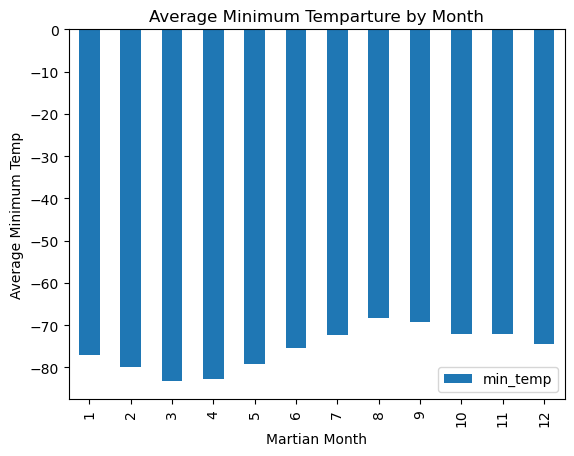

In [15]:
# Plot the average temperature by month
avg_min_temps_df.plot.bar()
plt.title('Average Minimum Temparture by Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temp')
plt.show()

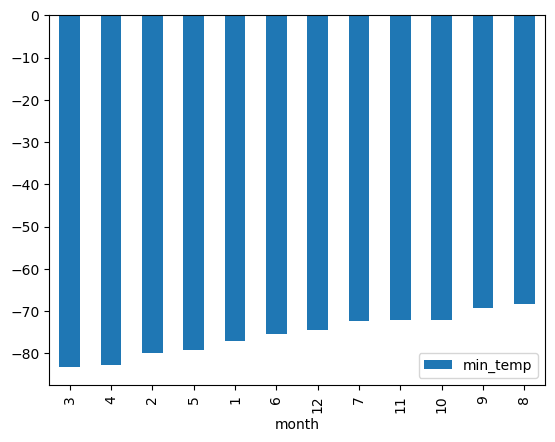

Min Temp: min_temp   -83.307292
dtype: float64
Max Temp: min_temp   -68.382979
dtype: float64


In [16]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temps_df.sort_values('min_temp').plot.bar()
plt.show()

print(f"Min Temp: {avg_min_temps_df.min()}")
print(f"Max Temp: {avg_min_temps_df.max()}")

In [17]:
# 4. Average pressure by Martian month
avg_pressure_df = mars_df[['month','pressure']].groupby('month').mean()
avg_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


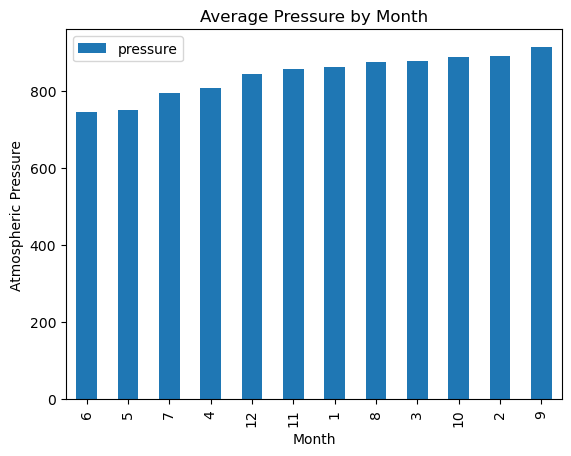

Min Pressure: pressure    745.054422
dtype: float64
Max Pressure: pressure    913.30597
dtype: float64


In [18]:
# Plot the average pressure by month
avg_pressure_df.sort_values('pressure').plot.bar()
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

print(f"Min Pressure: {avg_pressure_df.min()}")
print(f"Max Pressure: {avg_pressure_df.max()}")


<Axes: xlabel='sol'>

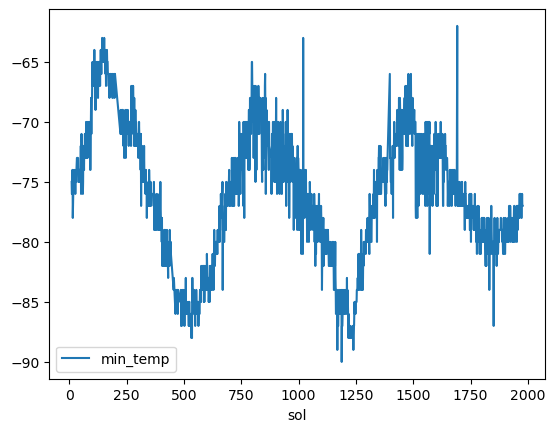

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
temperature_df = mars_df[['min_temp','sol']]
temperature_df.plot.line('sol','min_temp')

In [20]:
temperature_df.sort_values(['min_temp','sol']).iloc[:10]

,min_temp,sol
1093,-90.0,1188
1074,-89.0,1169
1144,-89.0,1239
452,-88.0,532
455,-88.0,535
1122,-88.0,1217
1128,-88.0,1223
1129,-88.0,1224
1132,-88.0,1227
1133,-88.0,1228


### Martian Year estimate

Based on the data above, we see the "low temperature" troughs around sol 532, and 1239. From this, we estimate that a Martian year takes approximately 700 Sols.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_df.to_csv('./data/part_2.csv')

In [22]:
browser.quit()